<h2> ====================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 23: Principal Component Analysis (PCA)</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=====================================================</h2>

<h2>Outline</h2>

<ul>
    <li>The Curse of Dimensionality
        <ol>
            <li> Faster Training</li>
            <li>Data Visualization</li>
            <li>Feature Importance</li>
        </ol>
    </li>
    <li>Approaches to Dimensionality Reduction</li>
    <li>Principal Component Analysis (PCA)
    <ol>
        <li> Theory</li>
        <li>Python Implementation via Scikit-Learn</li>
        </ol>
    </li>

<h2>The Curse of High Dimensionality</h2>

Often times real life problems involve data sets with hundreds of thousands of features. For example the task of classifying a 640 by 480 pixel image. Each observation would have $640*480=307200$ features. Having a high number of features not only makes the training very slow but it can also make it very difficult to find a good solution and is subject to overfit, especitally if we don't have enough training data relative to the number of features.

It can be shown that high dimensional data sets are at a very high risk of being very sparse; that is, the majority of the training data will most likely be very far apart from one another. This is because, loosely speaking, there is simply a lot more space in high dimensions. Moreover, a new observation will very likely be far away from any of the training data as well, which will result in overall poor and unreliable predictions, because the model has to make far-stretched extrapolations about each newly incoming observation.

To solidify the fact that poins in higher dimensions may be far apart from one another compute how far can two points be apart from one another in: (1) a segment of length one, (2) a unit square, and (3) a unit cube. The answers are of course: 1, $\sqrt{2}$, and $\sqrt{3}$, respectively. So, the higher you go in dimensions, the more room there is to place the points. In general, the diagonal of an $N$-dimensional unit cube is $\sqrt{N}$. So, while two points couldn't be more than one unit appart in a $1D$ cube, they can be $100$ units apart in a $10000D$ unit cube.

<h4>Faster Training</h4>

One way to combat the curse of high-dimensionality is to find a way to reduce the dimensionality of the problem (i.e. reduce the number of features) while trying to preserve as much of the original information as possible. While it may be possible in some cases, in general, reducing the dimensionality of the training data does not necessarily result in an improved performance of the model, but rather it simply speeds up the training process. One case where reducing the dimension of the training data may result in an increased performance of your model is if many of the features in the data have insignificant to no correlation at all with the response variable, so in essense they play the role of pure noise. In situations like these, reducing the dimension may result in filtering this noise out of the training data, which in turn may boost the performance of the model and result in better predictions.


<h4>Visualization</h4>

Another great reason for wanting to perform dimensionality reduction of your training data is for visualization purposes. In many cases it is possible to reduce the dimension of your data down to 2 or 3 dimensions, while preserving a significant amount of the original information, which enables us to graph the data and obtain a good idea of what the data looks like. This is a good technique to communicate your results to people who may not understand the mechanisms of the anlaysis but will understand a picture!

<h2>Dimensionality Reduction Techniques</h2>

There are many ways one can reduce the dimensionality of the training data. Some of the most popular and widely used ones are: Principal Component Analysis, Manifold Learning, t-Distributed Stochastic Neighbor Embedding (t-SNE) etc. 

In this lesson, we will focus exclusively on Principal Component Analysis (PCA).

<h2>Principal Component Analysis</h2>

PCA is a projection based dimensionality reduction technique. Specifically, it first identifies the hyperplane that lies closest to the data and then orthogonally projects the data onto the hyperplane. Let's illustrate it in 2D using the figure below.

<h3>Preserving Max Variance</h3>

Suppose we wanted to represent this 2D data in 1D. Then, how would we go about picking the right hyperplane (in this case the hyperplane would simply be a line)? Our goal should be to preserve as much of the information as we possibly can. With information in this case, for example, we mean the direction in which the data is spread the most. 

In this case, it is obvious that if we orthogonally project our data onto the <b> blue</b> line, then we preserve the maximum possible variance. 

If we were to project the data onto the <b>red</b> line, then we would loose most of the information, because the data would appear to be a lot more clustered than it actually is in reality!


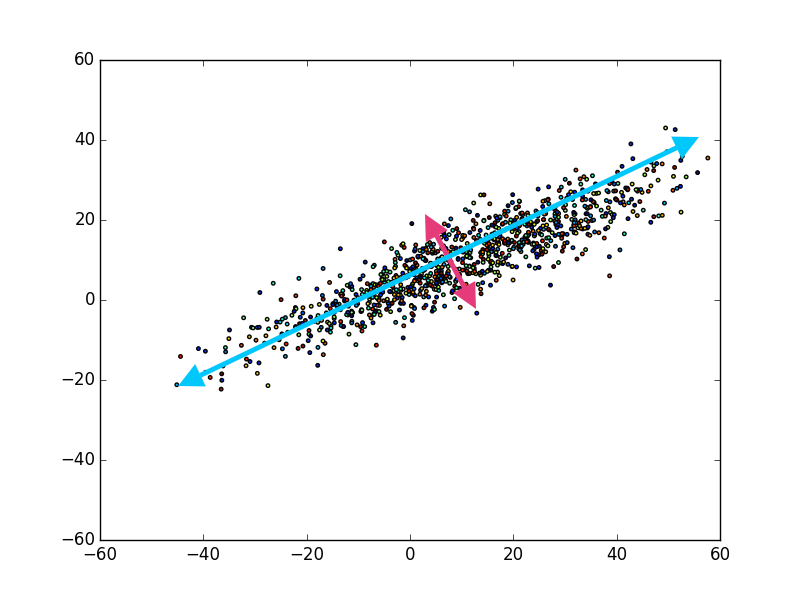


<h3>Computing Principal Components</h3>

PCA begins by finding the axis that accounts for the majority of the spread/variance in the data (for the example above it is the blue line). Then, it moves on to finding the second axis, orthogonal to the first one, that accounts for the largest amount of the remaining variance in the data (for the example above, that would be the red line). Then, it continues this way until it reaches either the pre-specified number of components we want to compute, or the total number of features (whichever comes first). 

In literature, the $i^{th}$ axis is called the $i^{th}$ <b>principal component (PC)</b> of the data. For the example above, the blue line would be the first principal component, and the red line would be the second principal component.

Principal components of a training data set $X$ are found by decomposing the array $X$ into its singular values. In literature this is known as the <b> Singular Value Decomposition (SVD)</b> of the array/matrix $X$. 

Recall, from Linear Algebra(...and you thought you'll never have to use Linear Algebra again! :)), that any real matrix $X$ can be decomposed/factored into a product of three matrices as follows:

$$X=U\Sigma V^T$$

where $U$ is an orthogonal matrix whose columns are the eigenvectors of $XX^T$ and $V$ is also an orthogonal matrix whose columns are the eigenvectors of $X^TX$, and $\Sigma=diag(\sigma_i)$ is a diagonal matrix whose diagonal entries $\sigma_i$, called singular values, are square roots of the eigenvalues of $X^TX.$

So, one can write $$X=\sum_i^r\sigma_i\, \vec{u}_i\,\vec{v}_i^T,\hspace{1cm} \text{ where } r=rank(X)$$ and $\sigma_1\geq \sigma_2\geq\dots\geq \sigma_r>0.$

Suppose that we have centered our data $X$ to have mean zero and that the columns represent features and rows the individual training observations. Then, the principal components of $X$ are simply the columns of the matrix $V$ OR, equivalently, the eigenvectors of the covariance matrix $$\frac{1}{n-1}X^TX$$

<b>Remark 1:</b> It is a better strategy to first compute the SVD of the matrix $X$ and only after compute the covariance matrix.

<b>Remark 2:</b> PCA doesn't work very well with discrete features. For such cases a better method could be Factor Analysis.

<h3>Explained Variance</h3>

The explained variance ratio is a quantity associated with each principal componetn and it represents the proportion of the dataset's variance that lies along that particular component. 

The explained variance ratio associated with the $i^{th}$ principal component is simply $$e_i=\frac{\lambda_i}{\sum_j^n\lambda_j}$$ where $\lambda$'s are the eigenvalues of the covariance matrix.

So, the first principal component is the eigenvector with the largest eigenvalue!

<h2>Python Ilustration</h2>

<h4>LinAlg SVD Tool</h4>

First we will explain how one can compute the principal components using Numpy's svd() method. We will use the Wisconsin Cancer data set to illustrate PCA.

In [7]:
import numpy as np
from numpy.linalg import svd

In [8]:
import pandas as pd

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer=load_breast_cancer()

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [123]:
X=pd.DataFrame(cancer['data'],columns=cancer.feature_names)
y=cancer.target

In [124]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3>Centering & Scaling</h3>

In [149]:
X_c=(X-X.mean(axis=0))/X.std(axis=0)

In [150]:
X_c.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [356]:
# Computing SVD of X_C

U, S, Vt=svd(X_c)[0],np.diag(np.append(svd(X_c)[1],np.zeros(X.shape[0]-30)))[:,:30],-svd(X_c)[2]

In [358]:
#Let's just quickly check that multiplying the matrices U*S*Vt we get back the matrix X

pd.DataFrame(np.matmul(U,np.matmul(S,-Vt)),columns=X_c.columns).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


<h3> Orthogonal Projections to a k-Dimensional Hyperplane</h3>

Now that we have computed all of the principal components of $X$ we can reduce the dimensionality of $X$ down to $k-$dimensions, where $k$ can be any number between $1$ and $30$.

For visualization purposes, let's project $X$ down to $2$ and then $3$ dimensions respectively. In other words, we will project $X$ upon the first two, and three principal components of $X$, respectively.


Recall from linear algebra that to obtain the $k-$dimensional projection, $X_{k-dim}$, of $X$ onto its first $k$ principal components, we need to multiply $X$ by the matrix $W_k$ containing the first $k$ columns of $V$. Said differently, we are finding the projection of $X$ onto the column space of $W_k$.

Let's do this below:

In [308]:
W2=Vt.T[:,:2]
W3=Vt.T[:,:3]

In [309]:
X2d=X_c.dot(W2)
X3d=X_c.dot(W3)

In [310]:
X2d.head()

,0,1
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359


In [311]:
X3d.head()

,0,1,2
0,9.184755,1.946870,1.122179
1,2.385703,-3.764859,0.528827
2,5.728855,-1.074229,0.551263
3,7.116691,10.266556,3.229948
4,3.931842,-1.946359,-1.388545


<h4>Visuzlizing in 2D</h4>

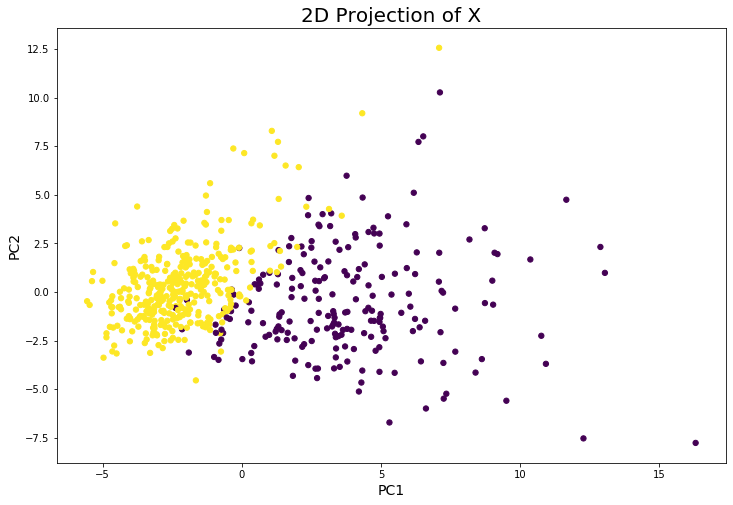

In [312]:
plt.figure(figsize=(12,8))
plt.scatter(x=X2d[0],y=X2d[1],s=28,c=y)

plt.ylabel("PC2",fontsize=14)
plt.xlabel("PC1",fontsize=14)
plt.title("2D Projection of X",fontsize=20)

plt.show()

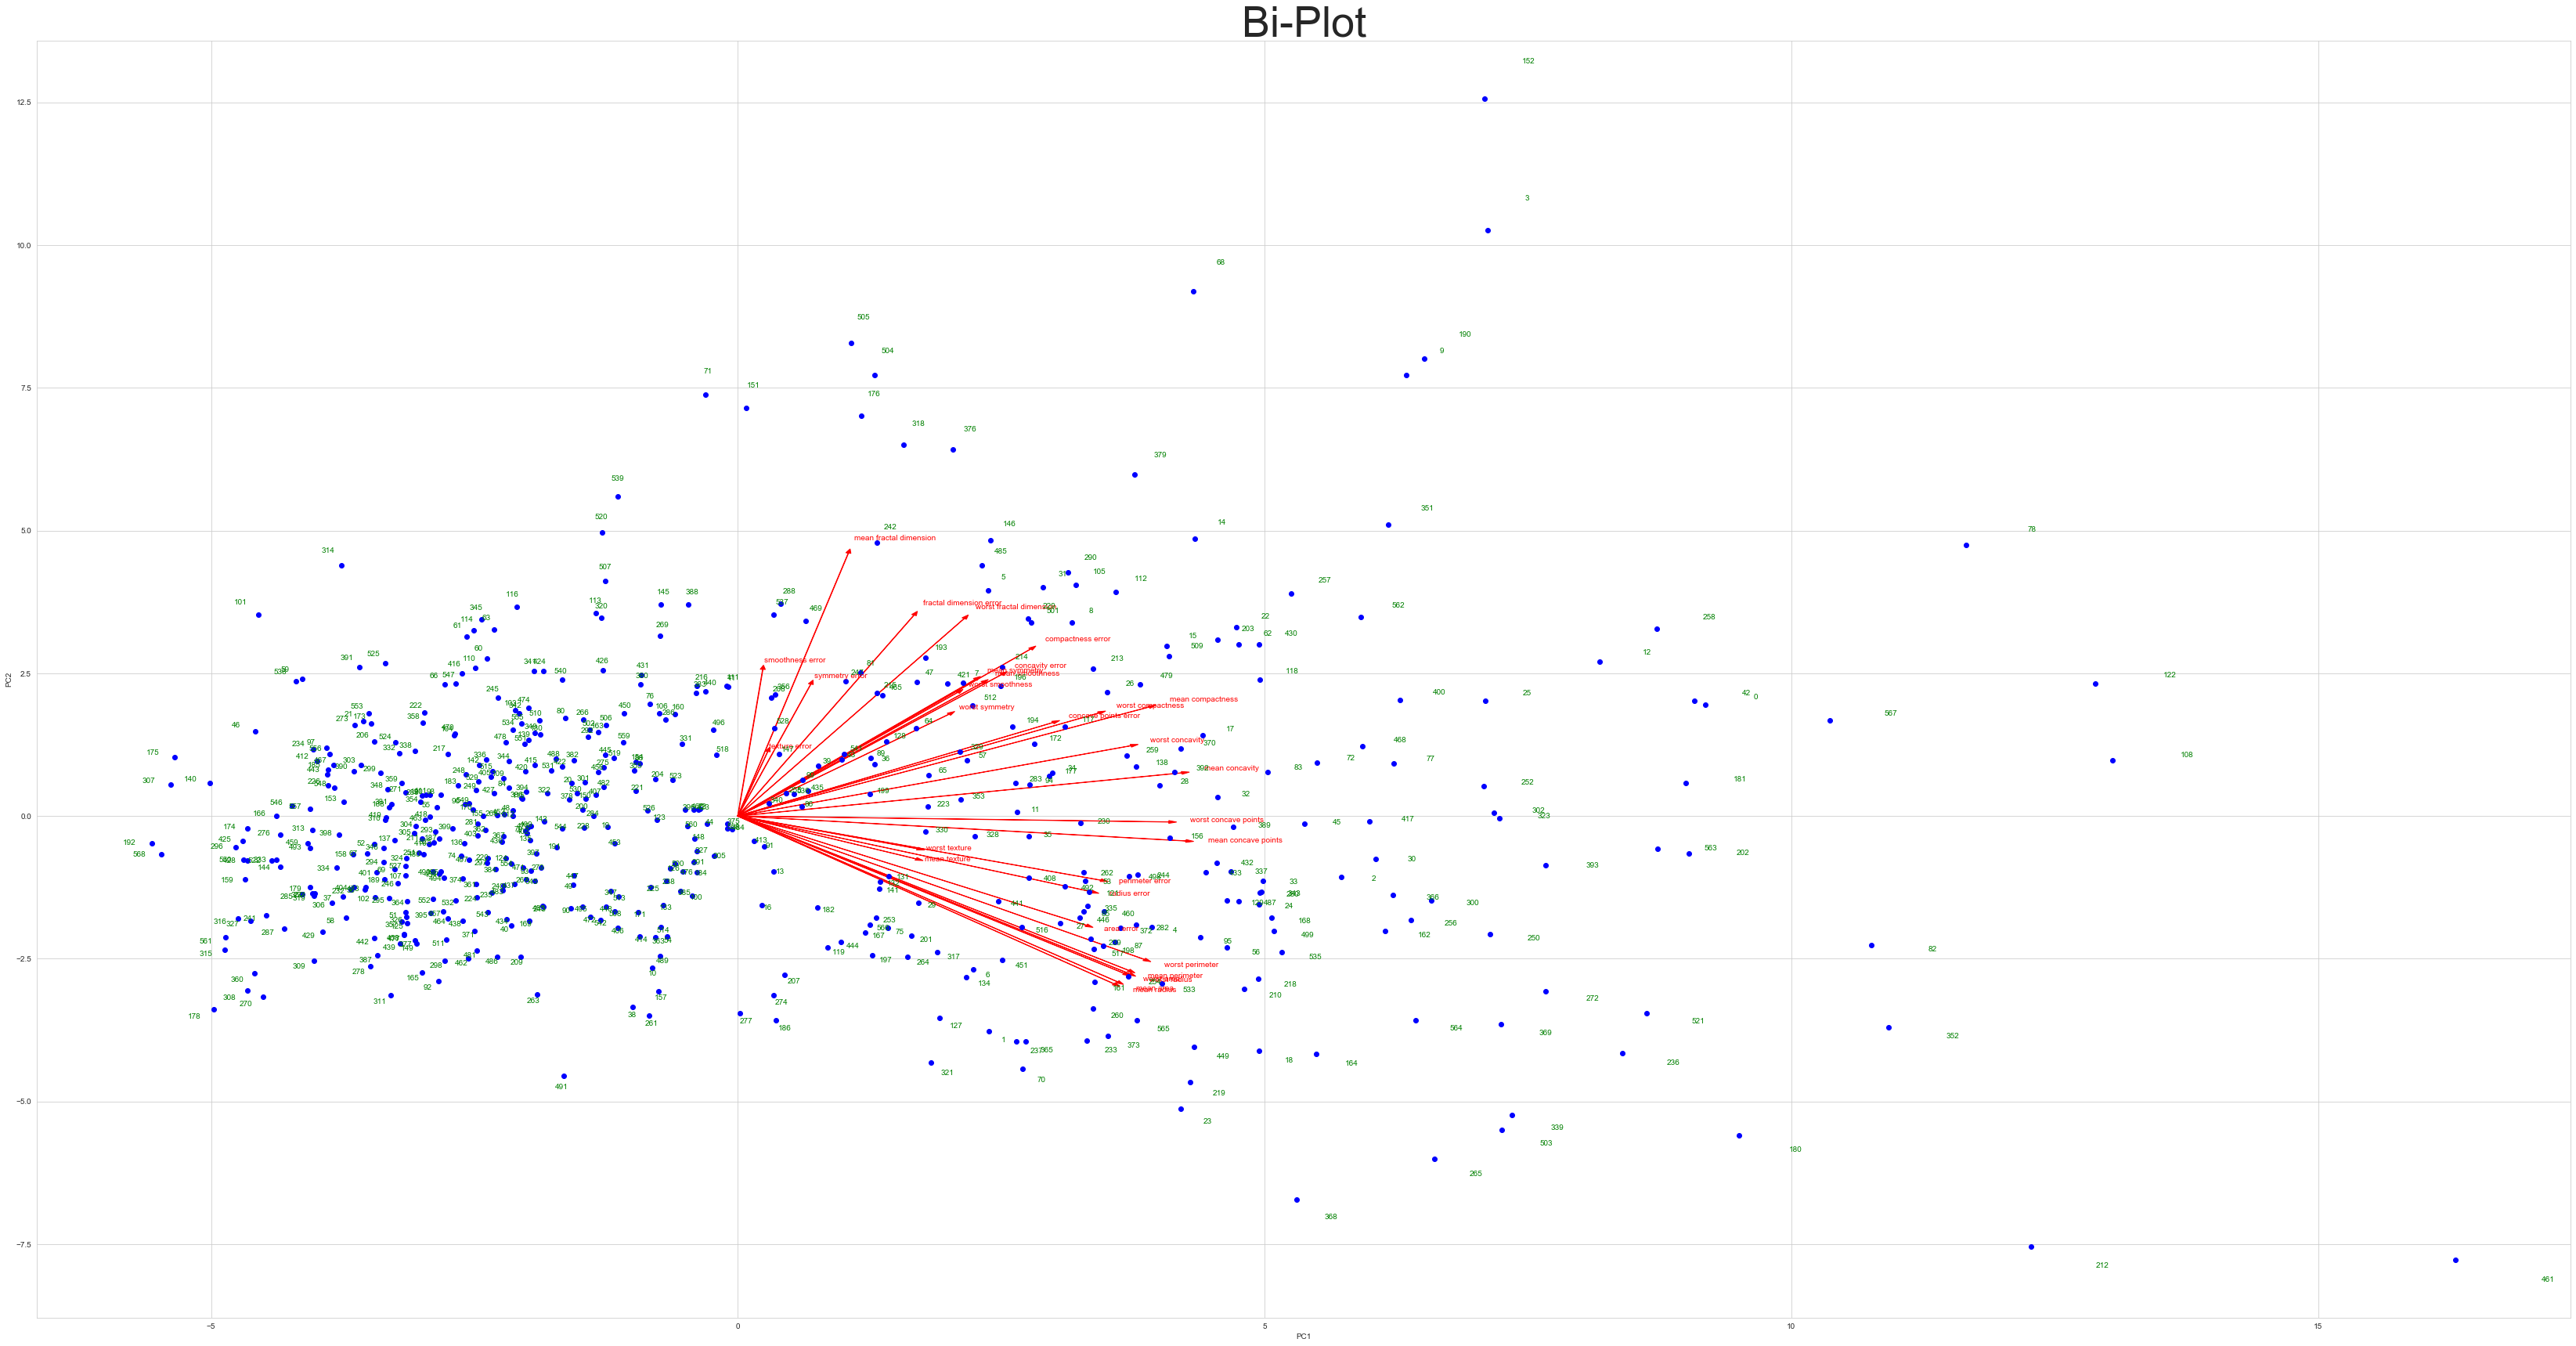

In [361]:
#below we plot a biplot, where we depict the principal componet scores as well as loading vectors

plt.figure(figsize=(58,30))

#we extract the first and second loading vectors 

x_vector=W2[:,0]
y_vector=W2[:,1] 

#below we extract the first and second score vectors
xs=X2d[0]
ys=X2d[1]

#below we visualize the projections

for i in range(len(x_vector)):
    plt.arrow(0,0,x_vector[i]*max(xs),y_vector[i]*max(ys),color='r', width=0.005,head_width=0.05)
    plt.text(x_vector[i]*max(xs)*1.05,y_vector[i]*max(ys)*1.05,list(X_c.columns.values)[i],color='r')

for i in range(len(xs)):
    plt.plot(xs[i],ys[i],'bo')
    plt.text(xs[i]*1.05,ys[i]*1.05,list(df.index)[i],color='g')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Bi-Plot",fontsize=54)
plt.show()

<h4>Visualizing in 3D</h4>

In [314]:
from mpl_toolkits.mplot3d import Axes3D

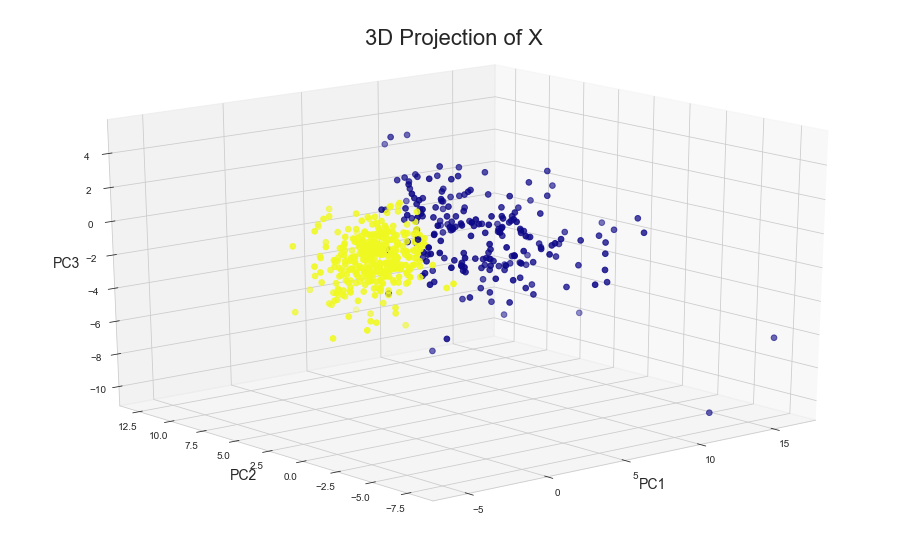

In [367]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=X3d[0],ys=X3d[1],zs=X3d[2],s=32,c=y,cmap='plasma')

ax.set_xlabel("PC1",fontsize=14)
ax.set_ylabel("PC2",fontsize=14)
ax.set_zlabel("PC3",fontsize=14)
ax.set_title('3D Projection of X',fontsize=22)
ax.view_init(20,230)
plt.show()

<h3>How accurate is this 2D and 3D representation of our data?</h3>

To answer this question we need to determine how much of the total variance in $X$ we have captured by projecting down onto a $2D$ and $3D$ hyperplane, respectively. 

In [316]:
svd(X_c)[1]

array([86.85593338, 56.85674472, 40.00743705, 33.54107615, 30.60194358,
       26.18737397, 19.58379495, 16.45352654, 15.38818551, 14.11360632,
       12.92068557, 12.17947693, 11.70858906,  9.44359693,  7.31222676,
        6.73513704,  5.80849838,  5.4669433 ,  5.30125194,  4.20696335,
        4.12608819,  3.94785773,  3.71827861,  3.20238099,  2.96536037,
        2.15520288,  1.97976349,  0.95012837,  0.65216575,  0.274899  ])

In [317]:
#this function will compute the explained variance given a set of centered data X_c, and the number of componetns n

def explained_variance(X_c,n):
    """
    X_c: centered data set
    n: number of principal components we want to compute
    
    """
    #recall eigenvalues are the squares of the singular values
    eigen_vals=np.array([x**2 for x in svd(X_c)[1]])
    tot=eigen_vals.sum()
    ct=0
    for i in range(n):
        ct+=eigen_vals[i]
    return ct/tot
        

In [318]:
explained_variance(X_c,2)

0.6324320765155941

In [319]:
explained_variance(X_c,3)

0.726363709089908

So, the first two principal components capture around $63\%$ of the variability in the cancer data while the first three pcas capture around $73\%$ of the variability in our data. Saying it plainly, the $2D$ and $3D$ representations of our $30D$ data are fairly good representations and give us a fairly good idea of how the orignal data is spread out in the original $30D$ space.

<h3>Can we determine which features are the most responsible for the observed variance in the data?</h3>

In [320]:
loadings=pd.DataFrame(W2,columns=['PC1','PC2'],index=X_c.columns)

(-0.1, 2.5)

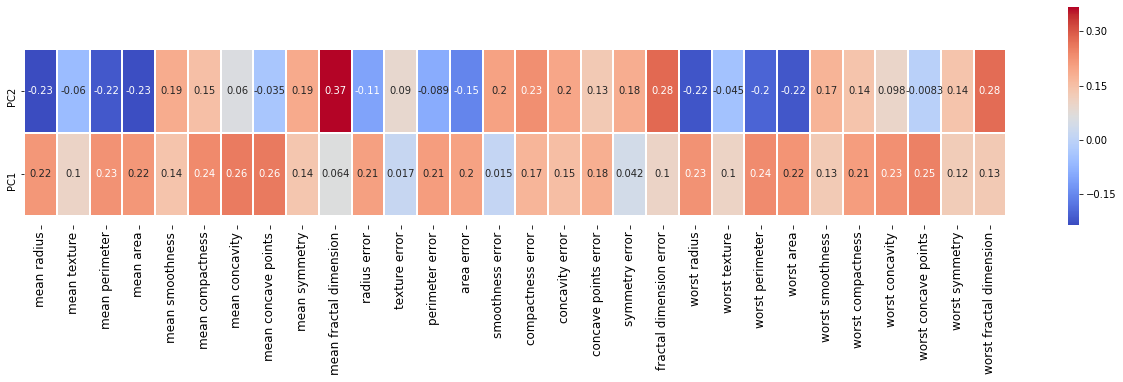

In [321]:
plt.figure(figsize=(22,4))
sns.heatmap(loadings.T, cmap='coolwarm',annot=True,lw=1)
plt.xticks(fontsize=12)
plt.ylim(-0.1,2.5)

As a rule of thumb the features that have a higher score may be thought of as the ones most responsible for the observed variance in our data. For example, looking at the heatmap above, one may say that <b>mean radius, mean area, worst radius, worst area, mean perimeter etc.</b> are among the features that are the most responsible for the observed variance. 

In other words, if we look among all the people in our data, then most likely the measurements that differ the most among the subjects are the onses that we mentioned above.

<h2>PCA with Scikit-Learn</h2>

Scikit-learn has a built in method that does everything that we did above. It is recommended that we scale the data before performing PCA.

In [322]:
from sklearn.decomposition import PCA

In [323]:
pca=PCA(n_components=2)

In [324]:
X_2d=pca.fit_transform(X_c)

We can obtain the computed components now:

In [329]:
pc1,pc2=pca.components_.T[:,0],pca.components_.T[:,0]

Let's quickly compare pc1,pc2 with W2[:,0] and W2[:,1] respectively. They should be identical.

In [332]:
pc1

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [333]:
W2[:,0]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

Similarly, if we plot X_2d we should get the exact same 2D representation as before.

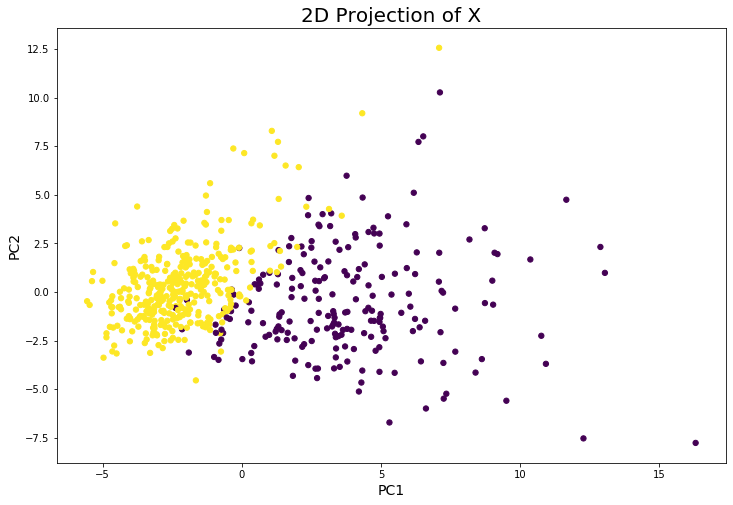

In [337]:
plt.figure(figsize=(12,8))
plt.scatter(x=X_2d[:,0],y=X_2d[:,1],s=28,c=y)

plt.ylabel("PC2",fontsize=14)
plt.xlabel("PC1",fontsize=14)
plt.title("2D Projection of X",fontsize=20)

plt.show()

<h4>Explained Variance</h4>

Once can easily obtain the explained variance ratio as well:

In [338]:
expl_var=pca.explained_variance_ratio_

In [339]:
expl_var

array([0.44272026, 0.18971182])

In [340]:
expl_var.sum()

0.6324320765155946

<h2>How to pick the right dimension?</h2>

Similarly as in the K-Means Clustering we can pick the right dimension $k$ to project upon via the <b>elbow</b> trick. 

In [341]:
pca=PCA(n_components=25)

In [342]:
pca.fit_transform(X_c)

array([[ 9.18475521e+00,  1.94687003e+00, -1.12217877e+00, ...,
         8.44442912e-02, -1.75102213e-01, -1.50887294e-01],
       [ 2.38570263e+00, -3.76485906e+00, -5.28827374e-01, ...,
        -2.17526664e-01,  1.12801927e-02, -1.70360355e-01],
       [ 5.72885549e+00, -1.07422859e+00, -5.51262540e-01, ...,
        -7.42258139e-02,  1.02671419e-01,  1.71007656e-01],
       ...,
       [ 1.25507494e+00, -1.90062436e+00,  5.62235817e-01, ...,
        -2.00135827e-01, -4.47797442e-02,  2.42662187e-03],
       [ 1.03656734e+01,  1.67054021e+00, -1.87537919e+00, ...,
         1.68671549e-01, -1.95796692e-01,  3.77498289e-01],
       [-5.47042990e+00, -6.70047220e-01,  1.48913280e+00, ...,
         3.78812140e-02, -7.50448656e-02, -1.74926193e-02]])

In [372]:
import plotly.graph_objects as go

In [424]:
layout = go.Layout(template="plotly_dark", width=800, height=500,
                           title_text='Choosing the right dimension for PCA',
                           xaxis_title='# Dimensions',
                           yaxis_title='Explained Variance Ratio',
                   xaxis = dict(tickmode = 'linear',tick0 = 0,dtick = 2),
                   yaxis = dict(tickmode = 'linear',tick0 = 0,dtick = 0.05)
                  )

fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(mode='lines+markers',x=list(range(1,26)),y=pca.explained_variance_ratio_,
                        marker=dict(size=5,line=dict(color='red',width=5)),
                            hovertemplate =
                                '<b>Dimension</b>: %{x}'+
                                '<br><b>ExplVarRatio</b>: %{y:.3f}<br>'))

So, in this case since after dimension $k=3$ there is a small increase in explained variance, projecting onto a $3-$dimensional hyperplane may be a good choice. There doesn't seem to be a significant benefit for example if one project down onto say a $7-$dimensional hyperplane.